In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, FormatStrFormatter

In [108]:
df_list = [] #empty list to hold all the dataframes

In [126]:
n_measurements = 20 #no. of different values used
max_gRate = 0.083
immigration_rate = 20.
K = 550
#when deterioration greater than this value we change from immigration dominated to deterioration dominated
phase2_lim = immigration_rate/K 
phase2_lim_scaled = phase2_lim/max_gRate

N_thresh_min = 0.45 #range of values for N*
N_thresh_max = 0.95
delta_N_thresh = (N_thresh_max - N_thresh_min)/n_measurements

det_ratio_min = 0.1 #range of values for deterioration ratio
det_ratio_max = 0.9
delta_det_ratio = (det_ratio_max - det_ratio_min)/n_measurements


In [110]:
#iterate through all the seperate csv files and append them to the list
for n in range(n_measurements+1):
    for d in range(n_measurements+1):
        n_thresh = N_thresh_min + n*(delta_N_thresh)
        det_ratio = det_ratio_min + d*(delta_det_ratio)
        
        n_thresh_str = "{:.3f}".format(n_thresh)
        det_ratio_str = "{:.3f}".format(det_ratio)
        
        df_list.append(pd.read_csv("ms_diags_results/ms_diags-N^-"+n_thresh_str+"_rDetRatio-"+det_ratio_str+".csv"))

In [111]:
#add all the dataframes together
param_data = pd.concat(df_list ,ignore_index=True)
param_data = param_data.rename({'det_rate_ratio': 'det_rate'}, axis='columns')
param_data['det_ratio'] = param_data['det_rate']/max_gRate

In [112]:
pivot = param_data.pivot(index='N*', columns='det_ratio', values='thickness')

0.43811610076670315


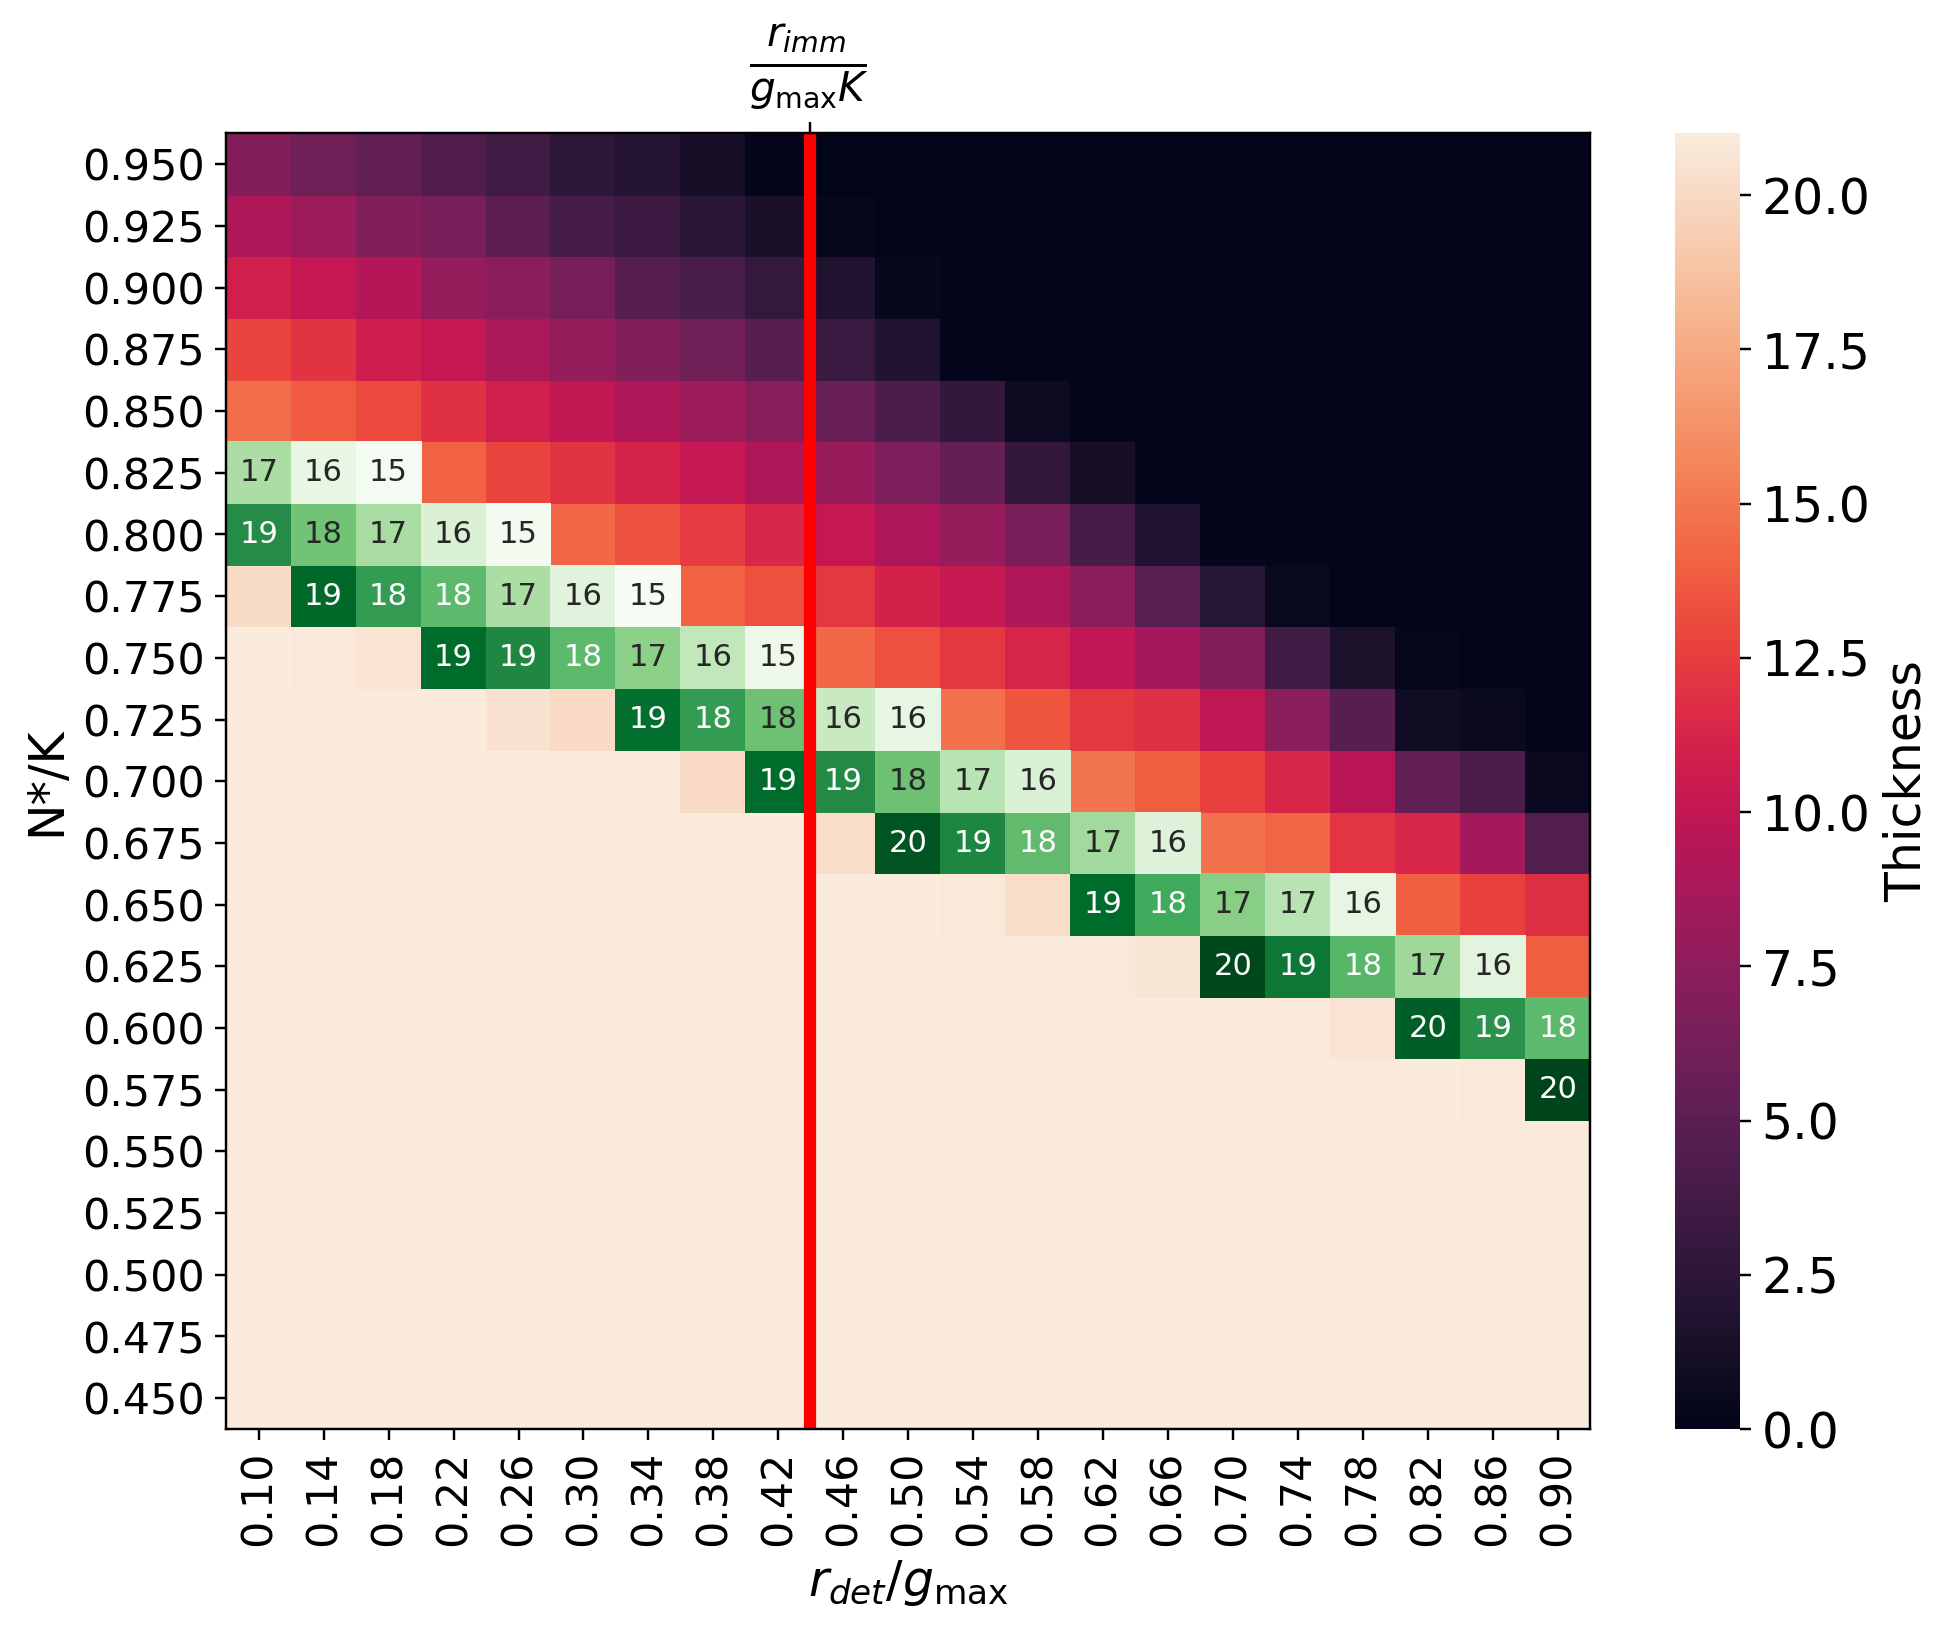

In [147]:
fig, ax = plt.subplots(dpi=220)
fig.set_size_inches(10, 7.8)
titleSize = 16
labelSize = 16
numbersize = 14
legendsize = 10
IDsize=12


#this mask will only plot values between 15 and 20
masko = (pivot < 15) | (pivot > 20)

#phase_mask = (pivot['det_ratio']) > 0.5

ax = sns.heatmap(pivot, annot=False)
ax_masked = sns.heatmap(pivot, mask=masko, cmap='Greens', cbar=False, annot=True)
#ax_masked2 = sns.heatmap(pivot, mask=phase_mask, cmap='Blues', cbar=False, annot=True)

ax.invert_yaxis()
labels_x = [label.get_text() for label in ax.get_xticklabels()]
ax.set_xticklabels(map(lambda x: "{:.2f}".format(float(x)), labels_x))
labels_y = [label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(map(lambda y: "{:.3f}".format(float(y)), labels_y))

ax2 = ax.twiny()
ax2.set_xlim(0.078, 0.92)
ax2.axvline(x=phase2_lim/max_gRate, linewidth=4, color='r')
print(phase2_lim/max_gRate)

ax.set_xlabel('$r_{det}/g_{\max}$', fontsize=labelSize)
ax.set_ylabel('N*/K', fontsize=labelSize)
ax.xaxis.set_tick_params(labelsize=numbersize)
ax2.xaxis.set_tick_params(labelsize=numbersize+5)
ax.yaxis.set_tick_params(labelsize=numbersize)

ax2.set_xticks([phase2_lim_scaled])
ax2.set_xticklabels(["$\\frac{r_{imm}}{g_{\max}K}$"])

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=labelSize)
cbar.set_label("Thickness", fontsize=labelSize)

plt.savefig('plots/optimalNThreshAndRDet.pdf')
plt.show()

In [114]:
pivot

det_ratio,0.10,0.14,0.18,0.22,0.26,0.30,0.34,0.38,0.42,0.46,...,0.54,0.58,0.62,0.66,0.70,0.74,0.78,0.82,0.86,0.90
N*,,,,,,,,,,,,,,,,,,,,,
0.450,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,...,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
0.475,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,...,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
0.500,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,...,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
0.525,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,...,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
0.550,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,...,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
0.575,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,...,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,20.90,19.95
0.600,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,...,21.00,21.00,21.00,21.00,21.00,20.90,20.55,19.55,18.60,17.80
0.625,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,...,21.00,21.00,20.90,20.65,19.90,19.10,17.85,16.95,15.75,13.90
0.650,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,...,20.80,20.25,19.35,18.15,17.25,16.55,15.65,14.00,12.70,11.75


In [115]:
pivot.keys()


Float64Index([0.09999999999999999, 0.13999999999999999,                0.18,
              0.21999999999999997,                0.26,                 0.3,
              0.33999999999999997, 0.37999999999999995,                0.42,
              0.45999999999999996,                 0.5,  0.5399999999999999,
                             0.58,                0.62,  0.6599999999999999,
                              0.7,                0.74,  0.7799999999999999,
                             0.82,                0.86,                 0.9],
             dtype='float64', name='det_ratio')